In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/energydata_complete.csv',index_col='date',infer_datetime_format=True)

/var/folders/cn/r_mvyq893c357lflld6x0pvw0000gn/T/ipykernel_96376/2278717110.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('../data/energydata_complete.csv',index_col='date',infer_datetime_format=True)


In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

## Let's imagine we want to predict just 24 hours into the future, we don't need 3 months of data for that, so let's save some training time and only select the last months data.

In [5]:
df = df.loc['2016-05-01':]

In [6]:
df = df.round(2)

In [7]:
test_days = 2

## # How many rows per day? We know its every 10 min
24*60/10


In [8]:
test_ind = test_days*144

In [9]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
length = 144 
batch_size = 1 
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=batch_size)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [17]:
model = Sequential()


model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))


model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [20]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


/var/folders/cn/r_mvyq893c357lflld6x0pvw0000gn/T/ipykernel_96376/687208369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,
2023-04-14 11:24:56.721418: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3421/3421 [==============================] - 56s 16ms/step - loss: 0.0119 - val_loss: 0.0101
Epoch 2/10
3421/3421 [==============================] - 59s 17ms/step - loss: 0.0080 - val_loss: 0.0098
Epoch 3/10
3421/3421 [==============================] - 60s 18ms/step - loss: 0.0075 - val_loss: 0.0086
Epoch 4/10
3421/3421 [==============================] - 61s 18ms/step - loss: 0.0073 - val_loss: 0.0085
Epoch 5/10
3421/3421 [==============================] - 60s 18ms/step - loss: 0.0073 - val_loss: 0.0085


In [21]:
loss=pd.DataFrame(model.history.history)

<Axes: >

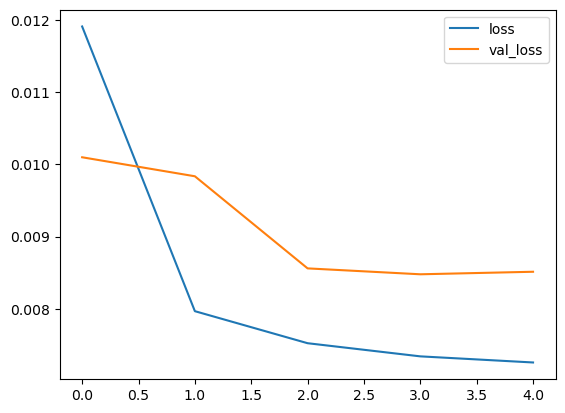

In [22]:
loss.plot()

In [23]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 12ms/step


In [24]:
true_predictions = scaler.inverse_transform(test_predictions)

In [25]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)